In [1]:
!pip install polars
!pip install japanize_matplotlib
!pip install --user --force-reinstall pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.6/783.6 kB 23.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 35.4 MB/s  0:00:016m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [polars]2m1/2 [polars]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 47.6 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120306 sha256=286d6c2644e6a6ebfb04fca84931b83f99049cf96d06b56865d859d772328522
  Stored in directory: /home/codespace/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize_matplotlib
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 50.9 MB/s  0:00:006m0:00:0100:01


In [2]:
import os
import polars as pl
from matplotlib import pyplot as plt
# plt.rcParams['font.family'] = ['IPAexGothic']
import japanize_matplotlib

In [3]:
df_pos = pl.read_csv('./data/pos.csv', encoding='utf-8-sig')
df_product = pl.read_csv('./data/product.csv', encoding='utf-8-sig')
df_weather = pl.read_csv('./data/weather.csv', encoding='utf-8-sig')

In [6]:
(df_pos
 .select("product_name","amount",)
 .head(20)
 )

product_name,amount
str,i64
"""崎陽軒風シウマイ弁当""",1200
"""崎陽軒風シウマイ弁当""",1200
"""崎陽軒風シウマイ弁当""",1200
"""崎陽軒風シウマイ弁当""",1200
"""崎陽軒風シウマイ弁当""",1200
…,…
"""崎陽軒風シウマイ弁当""",1200
"""温かいうどん弁当""",420
"""崎陽軒風シウマイ弁当""",1200


In [8]:
(df_pos
 .group_by("product_name")
 .agg(pl.col("amount").sum())
 .sort("amount",descending=True)
 )

product_name,amount
str,i64
"""野菜たっぷり豚しゃぶ弁当""",1928880
"""サラダチキン弁当""",1855040
"""鮭の塩焼き弁当""",1819350
"""ヘルシー野菜カレー""",1724840
"""豆腐ハンバーグ弁当""",1640790
…,…
"""夜空のお祭り弁当""",59400
"""屋台風焼きそば弁当""",48000
"""お祭りフライドチキンセット""",36000


<Axes: xlabel='product_name'>

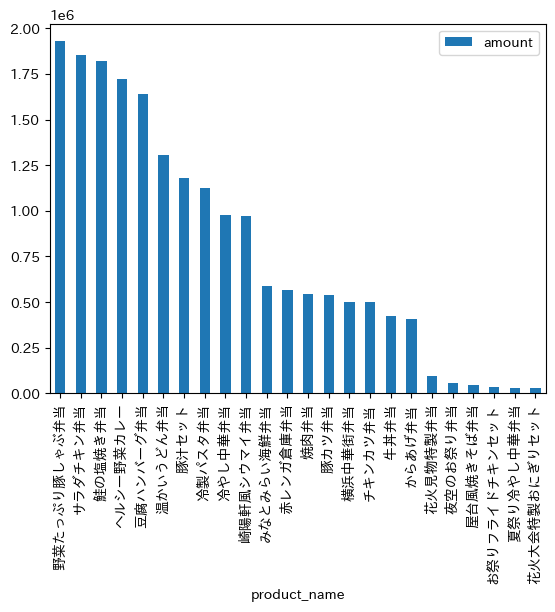

In [10]:
(df_pos
 .group_by("product_name")
 .agg(pl.col("amount").sum())
 .sort("amount",descending=True)
 .to_pandas()
 .plot(kind="bar",x="product_name",y="amount")
 )

月ごとの商品の売上高（各個）

<Axes: xlabel='month'>

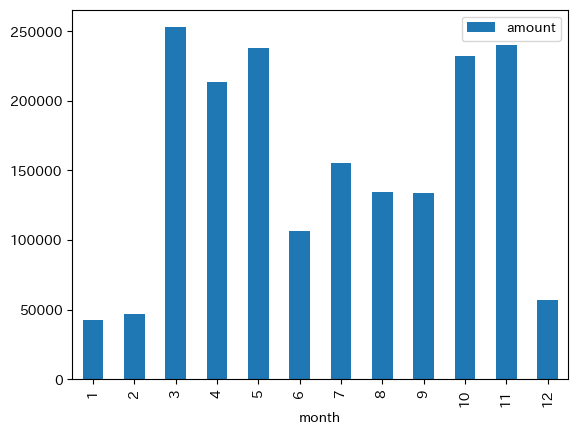

In [18]:
(df_pos
 .with_columns(
     pl.col("datetime")
     .str.strptime(pl.Date,"%Y/%m/%d %H:%M")
     .dt.month()
     .alias("month"))
 .group_by("month","product_name") 
 .agg(pl.col("amount").sum())
 .filter(pl.col("product_name")=="サラダチキン弁当")
 .sort("month")
 .to_pandas()
 .plot(kind="bar",x="month",y="amount")
 )